In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

### START CODE HERE ###
df_train = pdr.DataReader('^KS11', 'yahoo', datetime(2000,1,1), datetime(2010,12,31))
df_test = pdr.DataReader('^KS11', 'yahoo', datetime(2011,1,1), datetime(2020,5,22))
### END CODE HERE ###
training_set = df_train.iloc[:, 3:4].values
test_set = df_test.iloc[:, 3:4].values

In [ ]:
print(df_train.columns)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


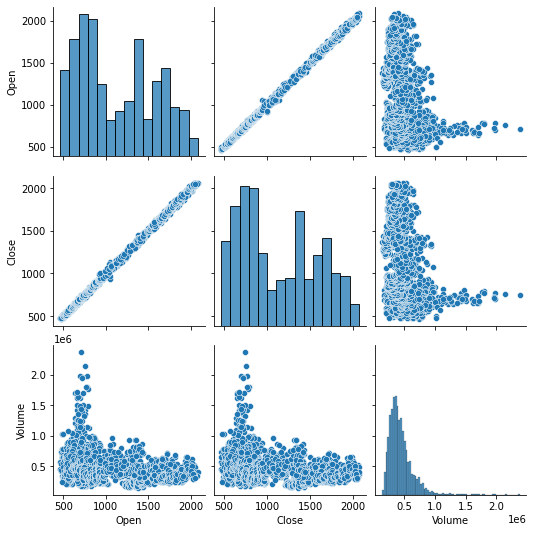

In [ ]:
sns.pairplot(df_train[['Open','Close','Volume']])

In [ ]:
print(training_set.shape)
print(test_set.shape)

(2721, 1)
(2304, 1)


Text(0, 0.5, 'price($)')

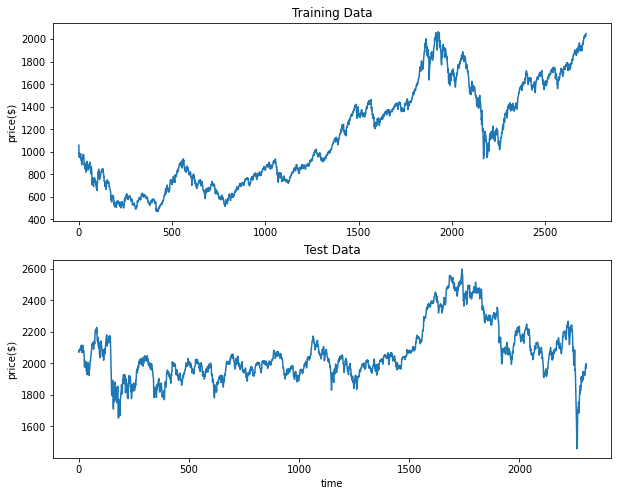

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)
plt.subplot(2, 1, 1)
plt.plot(training_set)
plt.title("Training Data")
plt.ylabel('price($)')

plt.subplot(2, 1, 2)
plt.plot(test_set)
plt.title("Test Data")
plt.xlabel('time')
plt.ylabel('price($)')

Text(0, 0.5, 'scaled price($)')

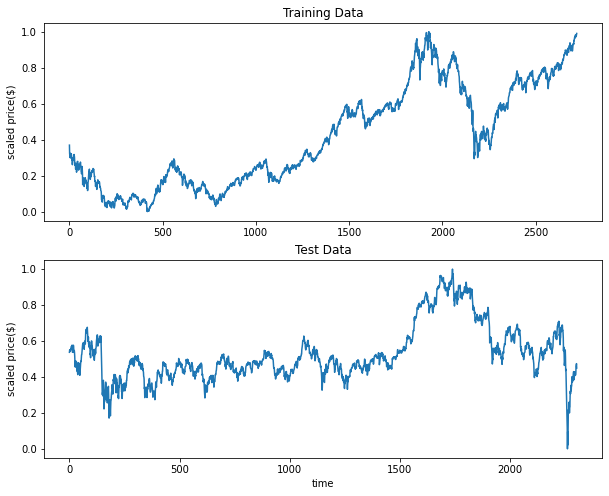

In [ ]:
sc1 = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc1.fit_transform(training_set)
sc2 = MinMaxScaler(feature_range=(0,1))
test_set_scaled = sc2.fit_transform(test_set)

plt.rcParams["figure.figsize"] = (10,8)
plt.subplot(2, 1, 1)
plt.plot(training_set_scaled)
plt.title("Training Data")
plt.ylabel('scaled price($)')

plt.subplot(2, 1, 2)
plt.plot(test_set_scaled)
plt.title("Test Data")
plt.xlabel('time')
plt.ylabel('scaled price($)')

In [ ]:
seq_length = 60
X_train = []
Y_train = []
for i in range(seq_length, training_set_scaled.shape[0]):
    X_train.append(training_set_scaled[i-seq_length:i, 0])
    Y_train.append(training_set_scaled[i, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test = []
Y_test = []
for i in range(seq_length, test_set_scaled.shape[0]):
    X_test.append(test_set_scaled[i-seq_length:i, 0])
    Y_test.append(test_set_scaled[i, 0])
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
print(X_train.shape)

(2701, 20, 1)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input, concatenate, GRU
from keras import optimizers
from tensorflow.keras.utils import plot_model
from keras.models import save_model, load_model

In [ ]:
input = Input(shape=(seq_length,1))
L1 = LSTM(32, return_sequences=True)(input)
L1 = Dropout(0.3)(L1)
L2 = LSTM(64, return_sequences=True)(input)
L2 = Dropout(0.3)(L2)
L3 = LSTM(128, return_sequences=True)(input)
L3 = Dropout(0.3)(L3)

concat = concatenate([L1,L2,L3])
output = LSTM(256, return_sequences=False)(concat)
output = Dropout(0.3)(output)
output = Dense(100)(output)
output = Dropout(0.3)(output)

output = Dense(1)(output)

model = Model(inputs = [input], outputs = [output])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 20, 1)]      0                                            
__________________________________________________________________________________________________
lstm_8 (LSTM)                   (None, 20, 32)       4352        input_3[0][0]                    
__________________________________________________________________________________________________
lstm_9 (LSTM)                   (None, 20, 64)       16896       input_3[0][0]                    
__________________________________________________________________________________________________
lstm_10 (LSTM)                  (None, 20, 128)      66560       input_3[0][0]                    
____________________________________________________________________________________________

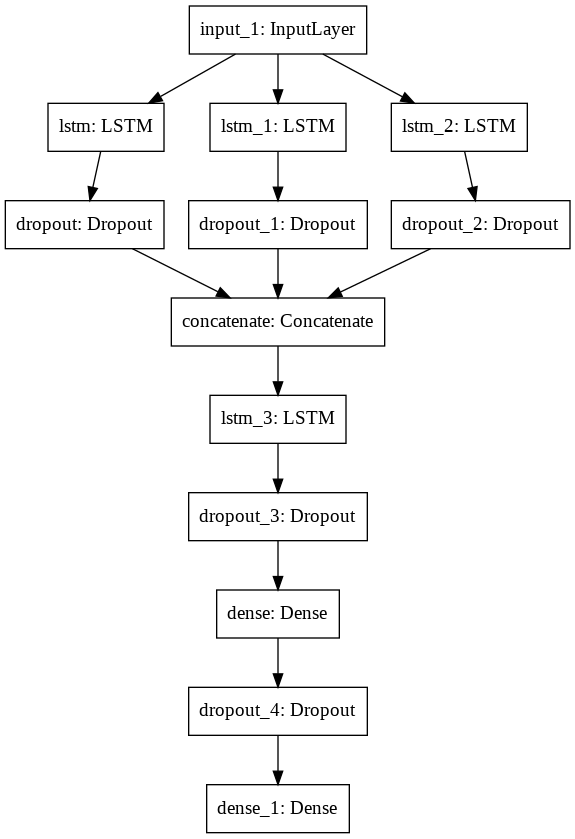

In [ ]:
plot_model(model)

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, Y_train, epochs = 100, batch_size = 128)

Epoch 1/100
22/22 [==============================] - 5s 14ms/step - loss: 7.3078e-04
Epoch 2/100
22/22 [==============================] - 0s 10ms/step - loss: 6.7650e-04
Epoch 3/100
22/22 [==============================] - 0s 10ms/step - loss: 6.1834e-04
Epoch 4/100
22/22 [==============================] - 0s 10ms/step - loss: 6.9043e-04
Epoch 5/100
22/22 [==============================] - 0s 10ms/step - loss: 6.3540e-04
Epoch 6/100
22/22 [==============================] - 0s 10ms/step - loss: 6.3618e-04
Epoch 7/100
22/22 [==============================] - 0s 11ms/step - loss: 7.4576e-04
Epoch 8/100
22/22 [==============================] - 0s 11ms/step - loss: 7.3142e-04
Epoch 9/100
22/22 [==============================] - 0s 10ms/step - loss: 7.0493e-04
Epoch 10/100
22/22 [==============================] - 0s 10ms/step - loss: 7.4594e-04
Epoch 11/100
22/22 [==============================] - 0s 11ms/step - loss: 6.3850e-04
Epoch 12/100
22/22 [==============================] - 0s 10ms/s

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
! pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


In [ ]:
import tensorflow as tf
from keras.models import save_model, load_model

model.save('drive/MyDrive/조용현_2016726052.h5')

In [ ]:
recent_model = load_model('drive/MyDrive/조용현_2016726052.h5')

predicted_X_train = recent_model.predict(X_train)
predicted_X_train = sc1.inverse_transform(predicted_X_train)

predcited_X_test = recent_model.predict(X_test)
predcited_X_test = sc2.inverse_transform(predcited_X_test)

mean_train_error = np.average(np.abs(training_set[seq_length-1:-1,:] - predicted_X_train))
mean_test_error = np.average(np.abs(test_set[seq_length-1:-1,:] - predcited_X_test))


print("평균 training error:", mean_train_error)
print("평균 test error:",mean_test_error)

평균 training error: 1.870172584643853
평균 test error: 1.1563030717251805


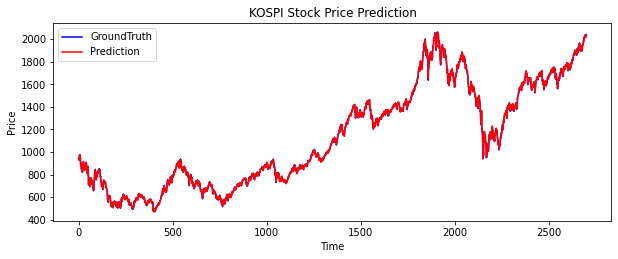

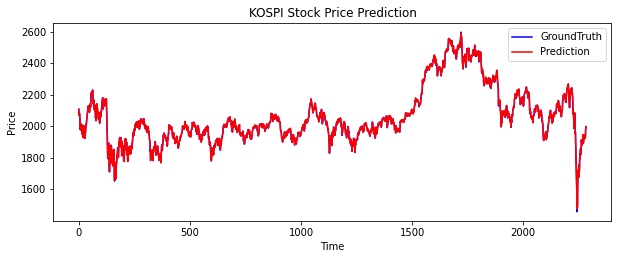

In [ ]:
plt.subplot(2, 1, 1)
plt.plot(training_set[seq_length-1:-1,:], color = 'blue', label = 'GroundTruth')
plt.plot(predicted_X_train, color = 'red', label = 'Prediction')
plt.title('KOSPI Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.subplot(2, 1, 2)
plt.plot(test_set[seq_length-1:-1,:], color = 'blue', label = 'GroundTruth')
plt.plot(predcited_X_test, color = 'red', label = 'Prediction')
plt.title('KOSPI Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()